In [23]:
#Modules to be imported
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
#reading of data
processeddata=pd.read_csv(r'C:\\Users\\diyas\\Desktop\\SEM5\\Data_Analytics\\Project\\preprocessed_wosq.csv', index_col='Id')

In [25]:
#confusion matrix function as part of performance metrics
def confusion_matrix_rep(y_test,y_pred,class_names,model):
    print("F1:",metrics.f1_score(y_test, y_pred,average='macro'))
    print("precision:",metrics.precision_score(y_test, y_pred,average='macro'))
    cm=confusion_matrix(y_test, y_pred, labels=class_names)
    print("confusion matrix:\n\n" ,cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    plt.title('Confusion matrix for '+model+" model", y=-0.5)
    fmt = 'd'

    # write the number of predictions in each bucket
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

    # if background is dark, use a white number, and vice-versa
        plt.text(j, i, format(cm[i, j], fmt),
         horizontalalignment="center",
         color="white" if cm[i, j] > thresh else "black")
    fig.colorbar(cax)
    ax.set_xticklabels([''] + class_names)
    ax.set_yticklabels([''] + class_names)
    ax.tick_params(axis='x', rotation=90)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [26]:
#without upsampling
di = {1: "extreme poverty", 2: "moderate poverty",3:"vulnerable households",4:"non vulnerable households"}
processeddata['Target']=processeddata['Target'].map(di)
class_names=processeddata.Target.unique()
a=processeddata
class_names=list(class_names)
col1=list(processeddata.columns)
#finding columns with object as datatypes and removing them for classification
data_notnum = list(a.select_dtypes(exclude=[np.number]).columns)
col1=list(filter(lambda a: a not in data_notnum , col1))
X_sq = processeddata[col1] # features for dataset which includes squared parameters
y_sq = processeddata.Target #target


In [27]:
#splitting into training and testing
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_sq, y_sq, test_size=test_size, random_state=seed)

In [28]:
#using the XGBOOST classifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
#predict using the model
y_pred = model.predict(X_test)

In [30]:
#performance metrics
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.19%


Confusion matrix 
F1: 0.6068461087088409
precision: 0.7654060089531236
confusion matrix:

 [[1905   49    4   10]
 [ 225  269   11   12]
 [ 244   57   92   10]
 [  89   35    5  137]]


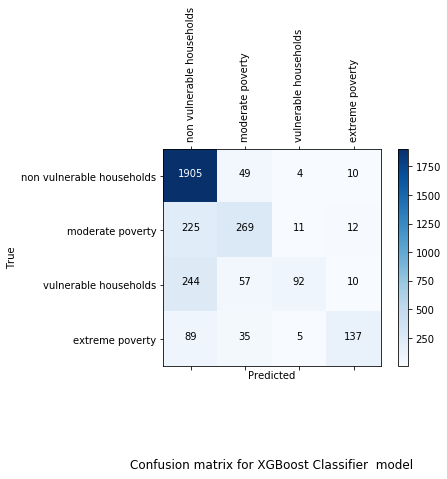

In [31]:
print('Confusion matrix ')
confusion_matrix_rep(y_test,y_pred,class_names,"XGBoost Classifier ")